## Coefficient series

In [1]:
import numpy as np
import scipy
import scipy.special
import matplotlib.pyplot as plt

In [2]:
def tau(x):
    return scipy.math.factorial(x-1)

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [55]:
k = 4

out_string = ""

for i in range(k+1):
    out_string += "+" + str(scipy.special.binom(k, i)**2) + "*cos(x)^" + str(2*i) + "*sin(x)^" + str(2*(k-i)) + "*" + str(tau(k+i+1)*tau(k-i+1))

In [56]:
out_string

'+1.0*cos(x)^0*sin(x)^8*576+16.0*cos(x)^2*sin(x)^6*720+36.0*cos(x)^4*sin(x)^4*1440+16.0*cos(x)^6*sin(x)^2*5040+1.0*cos(x)^8*sin(x)^0*40320'

In [2]:
from sympy import *
init_printing(use_unicode=True)

In [9]:
x = symbols('x')

In [26]:
i = symbols('i',integer=True,positive=True)

In [27]:
k = symbols('k',integer=True,positive=True)

In [29]:
simplify(cos(x)**(2*i)*sin(x)**(2*(k-i)))

In [57]:
exp = 19548*(-1+2*cos(x)**2)+4446*(1-8*cos(x)**2+8*cos(x)**4)+324*(-1+18*cos(x)**2-48*cos(x)**4+32*cos(x)**6)+4.5*(1-32*cos(x)**2+160*cos(x)**4-256*cos(x)**6+128*cos(x)**8) + 15997.5

In [58]:
simplify(exp)

## Prefactors

In [53]:
k = 4

for i in range(k+1):
    factor = scipy.special.binom(k, i) * tau(k+i+1)*tau(k-i+1)
    print(k, factor)

4 576.0
4 2880.0
4 8640.0
4 20160.0
4 40320.0


In [60]:
k = 1

for i in range(k+1):
    factor = scipy.special.binom(k, i)**2 * tau(k+1)*tau(k+1)
    print(k, factor)

1 1.0
1 1.0


In [35]:
(1080-432)/2

In [4]:
k = 4

for i in range(k+1):
    factor = scipy.special.binom(k, i)**2 * tau(k+1)**2
    print(k, factor)

4 576.0
4 9216.0
4 20736.0
4 9216.0
4 576.0


## f(theta)

In [84]:
from scipy.special import ellipk, ellipe, ellipkm1

def elliptic_kernel(theta):
    # prefactor = np.sqrt(np.dot(sample.T, sample) * np.dot(reference_vector, reference_vector))
    prefactor = 1
    #theta = angle_between(sample, reference_vector)
    parentheses1 = -np.sin(theta) ** 2 * ellipk(np.cos(theta)**2)
    parentheses2 = 2 * ellipe(np.cos(theta)**2)
    k = prefactor * (parentheses1 + parentheses2)
    
    if type(k) == np.ndarray and np.isnan(k[0]):
        k[0] = 2
    elif np.isnan(k):
        k = 2
    return k / 2 # corrects for sigma^2

In [85]:
def kernel(theta, k):
    if k == 0.5:
        return elliptic_kernel(theta)
    else:
        k = int(k)
        
        k_fac = scipy.math.factorial(k)
        result = 0
        for i in range(k+1):
            pref = scipy.special.binom(k, i)**2 * k_fac**2 
            # print(i, pref)
            result += pref * np.cos(theta)**(2*i)

        return result

In [86]:
def variance(theta, k, D):
    return 1/D * (kernel(theta, k*2) - kernel(theta, k)**2)

In [50]:
type(thetas)

numpy.ndarray

In [87]:
thetas = np.arange(0, np.pi, 0.01)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


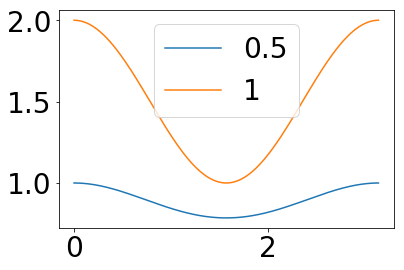

In [88]:
plt.plot(thetas, kernel(thetas, 0.5), label='0.5')
plt.plot(thetas, kernel(thetas, 1), label='1')
plt.legend()
plt.show()

## K=2

In [14]:
from scipy.stats import norm

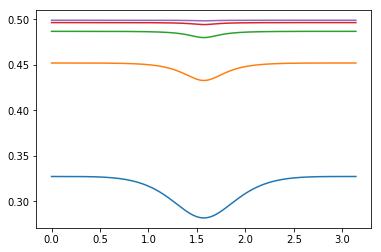

In [83]:
ks = [1, 2, 3, 4, 5]
D = 10000
err = 0.01

for k in ks:
    values = 1 - norm.cdf(err * kernel(thetas, k) / np.sqrt(variance(thetas, k, D)))
    # values = kernel(thetas, k) / np.sqrt(variance(thetas, k))
    plt.plot(thetas, values)

plt.yscale('linear')
plt.show()


In [46]:
values_1

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


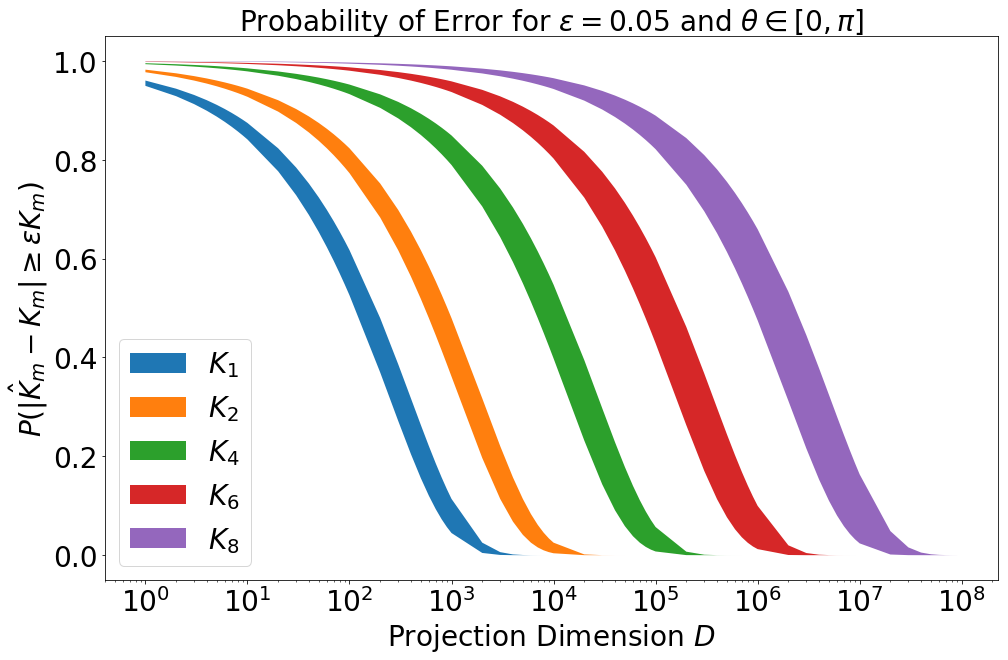

In [89]:
big_nums = [10**i for i in range(1,9)]
Ds = np.hstack([np.arange(num/10, num, num/10) for num in big_nums])

# Ds = np.array([2**i for i in range(25)])
# Ds = np.arange(1, 10**9, 10**9/10000)
err = 0.05

values = []

plt.figure(figsize=(16,10))

ks = [0.5, 1, 2, 3, 4]

for k in ks:
    
    error_term_1 = err * kernel(0, k) / np.sqrt(variance(0, k, Ds))
    error_term_2 = err * kernel(np.pi/2, k) / np.sqrt(variance(np.pi/2, k, Ds))
    
    values_1 = 1 - (norm.cdf(error_term_1) - norm.cdf(-error_term_1))
    values_2 = 1 - (norm.cdf(error_term_2) - norm.cdf(-error_term_2))
    # values = kernel(thetas, k) / np.sqrt(variance(thetas, k))
    # values.append(value)
    # plt.plot(Ds, values)
    plt.fill_between(Ds, values_1, values_2, label=r'$K_' + str(int(2*k)) + '$')

plt.legend(loc='lower left')
plt.ylabel(r'$P(|\hat{K}_m - K_m| \geq \epsilon K_m)$')
plt.xlabel(r'Projection Dimension $D$')
plt.title(r'Probability of Error for $\epsilon=0.05$ and $\theta \in [0, \pi]$')
plt.yscale('linear')
plt.xscale('log')
plt.savefig('figures/prob_error.pdf', format='pdf')
plt.show()


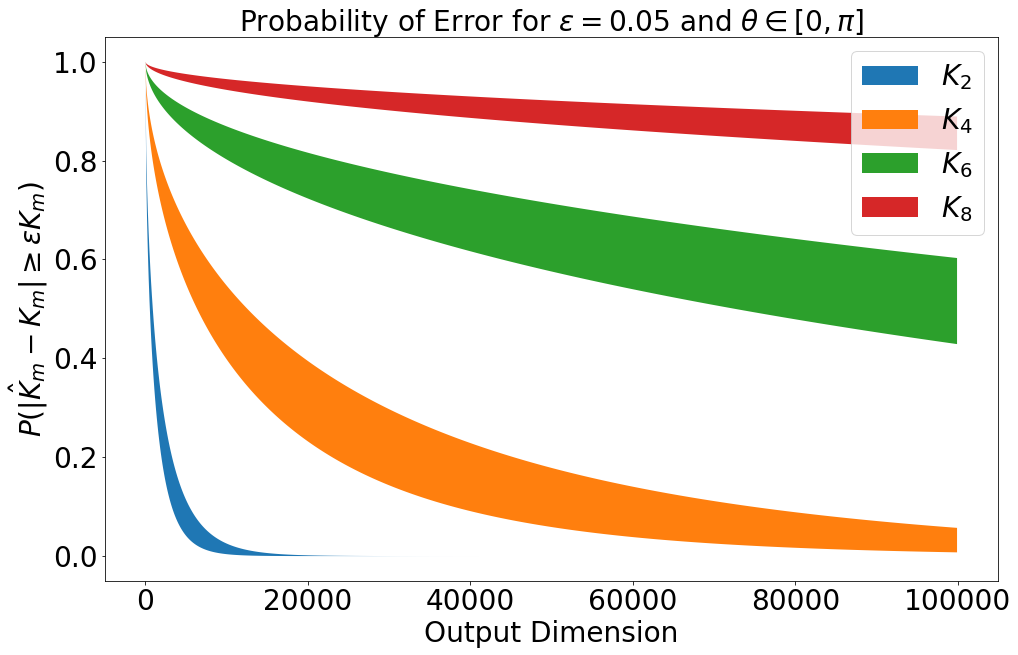

In [132]:
# big_nums = [10**i for i in range(1,9)]
# Ds = np.hstack([np.arange(num/10, num, num/10) for num in big_nums])

# Ds = np.array([2**i for i in range(25)])
Ds = np.arange(1, 10**5, 10**5/1000)
err = 0.05

values = []

plt.figure(figsize=(16,10))

ks = [1, 2, 3, 4]

for k in ks:
    error_term_1 = err * kernel(0, k) / np.sqrt(variance(0, k, Ds))
    error_term_2 = err * kernel(np.pi/2, k) / np.sqrt(variance(np.pi/2, k, Ds))
    
    values_1 = 1 - (norm.cdf(error_term_1) - norm.cdf(-error_term_1))
    values_2 = 1 - (norm.cdf(error_term_2) - norm.cdf(-error_term_2))
    # values = kernel(thetas, k) / np.sqrt(variance(thetas, k))
    # values.append(value)
    # plt.plot(Ds, values)
    plt.fill_between(Ds, values_1, values_2, label=r'$K_' + str(2*k) + '$')

plt.legend(loc='upper right')
plt.ylabel(r'$P(|\hat{K}_m - K_m| \geq \epsilon K_m)$')
plt.xlabel('Output Dimension')
plt.title(r'Probability of Error for $\epsilon=0.05$ and $\theta \in [0, \pi]$')
plt.yscale('linear')
plt.xscale('linear')
plt.savefig('figures/prob_error_lin.pdf', format='pdf')
plt.show()


In [104]:
1 - norm.cdf(0.0022)

0.49912232769110587

In [16]:

k = 1

coef(thetas, 2*k) / coef(thetas, k) - 1

0 4.0
1 16.0
2 4.0
0 1.0
1 1.0


11.0

In [18]:
thetas = np.arange(0, 2*np.pi, 0.1)

In [19]:
ks = [1,2,3,4]

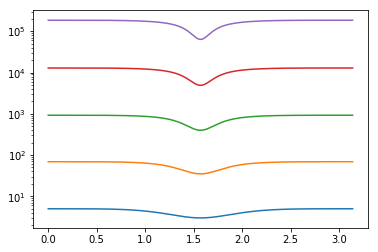

In [99]:
for k in ks:
    kernel_ratio = kernel(thetas, 2*k) / (kernel(thetas, k)**2) - 1
    plt.plot(thetas, kernel_ratio)
    
plt.yscale('log')
plt.xscale('linear')
plt.show()